A program to:
1. Find Heartrate
2. Check for Tachycardia or Bradycardia
3. Average Amplitude
4. Average Time Interval between two consecutive R peaks

Heartrate:  87.12019360043023
normal
Avg amplitude:  2.624506214285714
Avg Time interval between 2 consecutive R peaks:  688.7037037037037


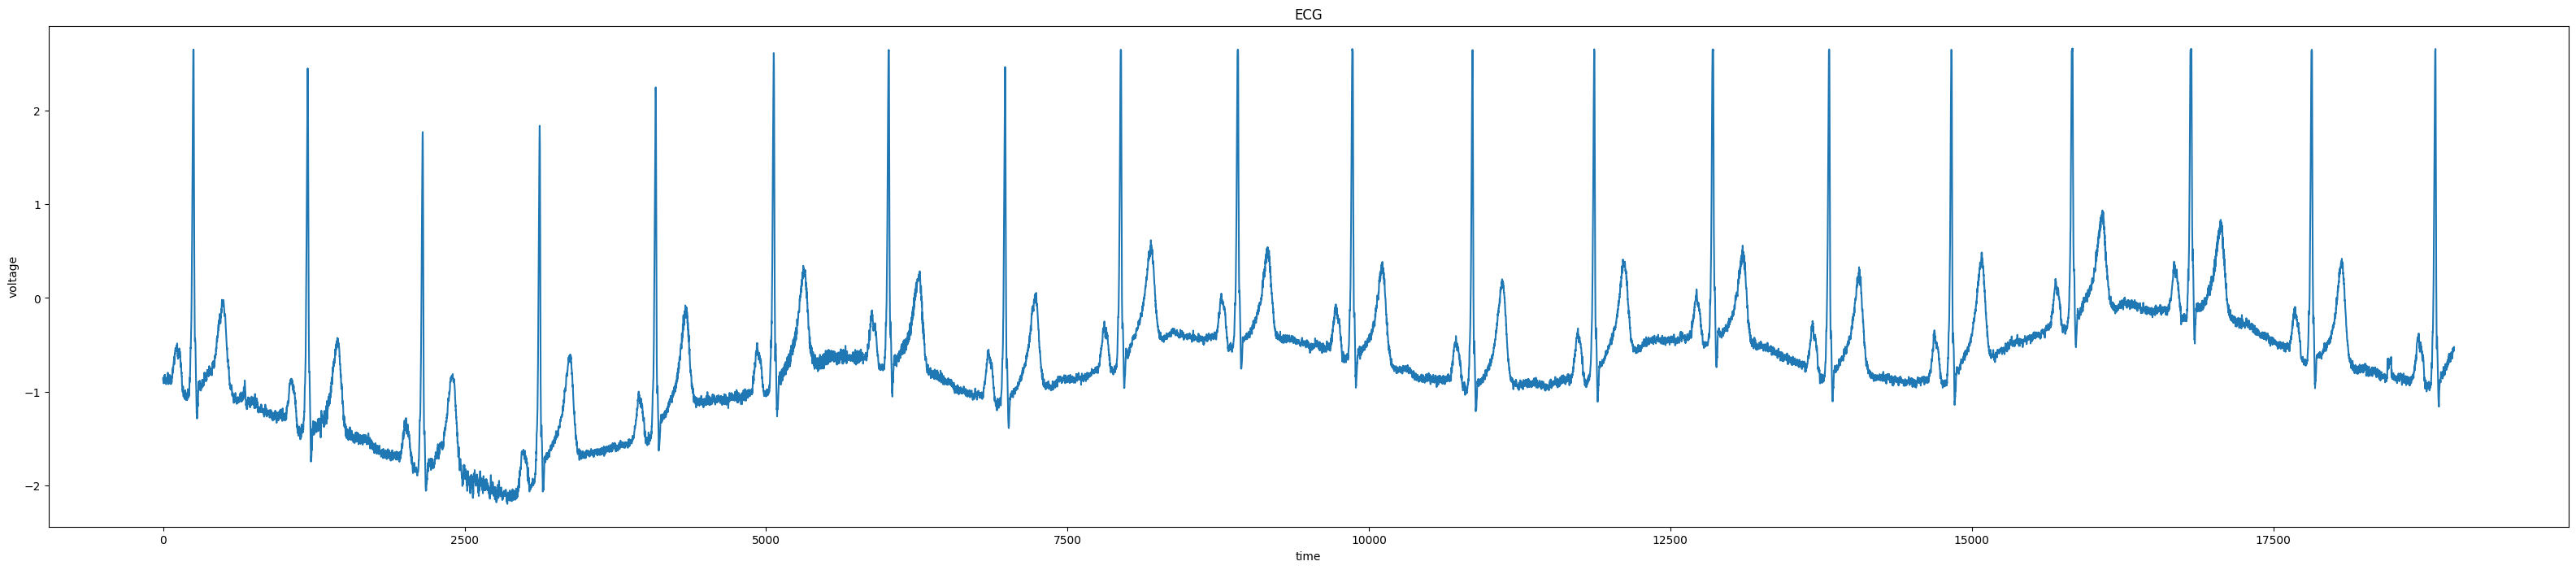

In [1]:
import matplotlib.pyplot as plt
import numpy as np

ecg = np.loadtxt(r"/workspaces/Biomedical-Signal-Processing-ECG/ecgdataset.txt")
x=ecg[1000:20000]
n=len(x)
time=np.arange(0,n,1)

plt.figure(figsize=(40,8))
plt.plot(time,x)
plt.title('ECG')
plt.xlabel('time')
plt.ylabel('voltage')

m=np.max(x)
threshold=m*0.7
R=[0]*n
for i in range(n):
    if x[i]>threshold:
        if x[i]>x[i+1] and x[i]>x[i-1]:
            R[i]=i
R=[i for i in R if i!=0]
#print(R)    # R is the array of time at which an R peak occurs

interval=np.diff(R,n=1,axis=0)  # interval is the array of time diff between 2 consecutive R peaks
#print(interval)
meaninterval=np.mean(interval)
#print(meaninterval)
heartrate=60*1000/meaninterval  # fs = 1000 
print("Heartrate: ", heartrate)
if heartrate>100:
    print("tachycardia")
elif heartrate<60:
    print("bradycardia")
else:
    print("normal")

Amplitudes = []
for peak in R:
    Amplitudes.append(x[peak]) 
#print(Amplitudes)      # Amplitude is the array of amplitudes of the R peaks
meanAmplitude=np.mean(Amplitudes)
print("Avg amplitude: ", meanAmplitude)
print("Avg Time interval between 2 consecutive R peaks: ", meaninterval)


A program to extract the following statistical features of heart rate variability using time
domain analysis.
1. AVNN - average of all RR intervals
2. SDNN - standard deviation of all RR intervals
3. Variance
4. Difference between longest and shortest interval
5. RMSSD - root mean square of RR intervals
6. pNN50 - percentage of successive RR intervals differing by more than 50 milliseconds

AVNN = 688.7037037037037
SDNN = 635.4431999452454
Variance = 403788.06035665306
RMSSD = 891.1209545036833
Difference = 2884
pNN50 = -0.3148148148148148


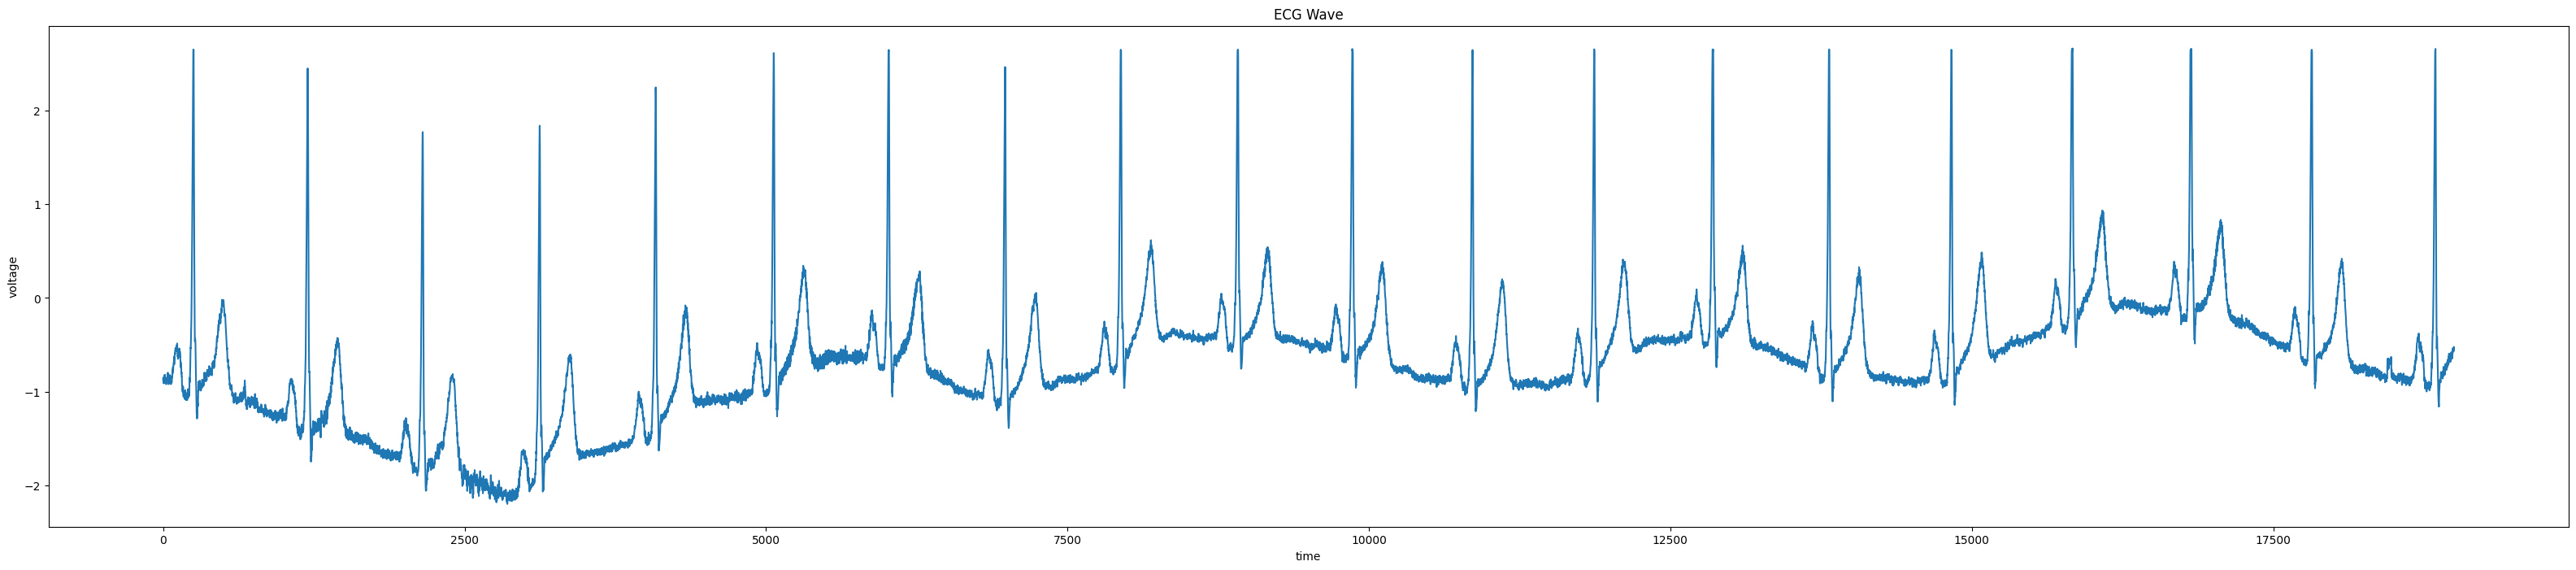

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
ecg = np.loadtxt(r"/workspaces/Biomedical-Signal-Processing-ECG/ecgdataset.txt")

x=ecg[1000:20000]
n=len(x)
time=np.arange(0,n,1)

plt.figure(figsize=(40,8))
plt.plot(time,x)
plt.title('ECG Wave')
plt.xlabel('time')
plt.ylabel('voltage')

m=np.max(x)
t=m*0.7
R=[0]*n
for i in range(n):
    if x[i]>t:
        if x[i]>x[i+1] and x[i]>x[i-1]:
            R[i]=i
R=[i for i in R if i!=0]

interval=np.diff(R,n=1,axis=0)
y=len(interval)

sum=0
for j in range(0,y):
    sum=sum+interval[j]
avg = sum/y
print("AVNN =", avg)
print(np.mean(interval))

z=0
for j in range(0,y):
    z=z+((interval[j]-avg)**2)
sdnn = math.sqrt(z/y)
print("SDNN =", sdnn)
print(np.std(interval))
print("Variance =", z/y)

w=0
for j in range(0,y-1):
    w=w+((interval[j]-interval[j+1])**2)
rmssd = math.sqrt(w/y-1)
print("RMSSD =",rmssd)

print("Difference =",(np.max(interval)-np.min(interval)))

s=0
for j in range(0,y-1):
    if (interval[j+1]-interval[j]) > 50:
        s=s+1
pNN50=float((s/y-1)*0.5)
print("pNN50 =",pNN50)

A program to remove High Frequency Noise from an ECG Signal

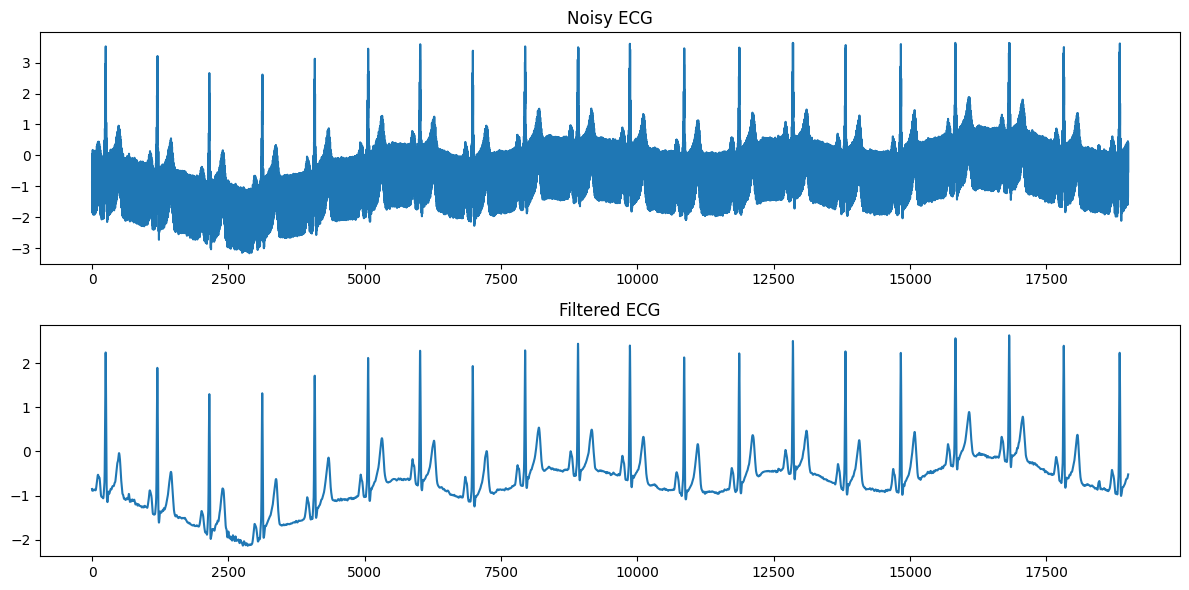

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sc
ecg=np.loadtxt(r"/workspaces/Biomedical-Signal-Processing-ECG/ecgdataset.txt")
x=ecg[1000:20000] # ECG signal
t=np.linspace(0,30,len(x)) 
y=np.sin(2*np.pi*500*t) # high frequency noise
sum=x+y # noisy ECG signal
fc=40
fs=1000
b,a=sc.butter(5, fc/(fs/2),'lowpass')
z=sc.filtfilt(b,a,sum)

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(sum)
plt.title('Noisy ECG')
plt.subplot(2,1,2)
plt.plot(z)
plt.title('Filtered ECG')
plt.tight_layout()
plt.show()

A program to remove baseline wandering of ECG

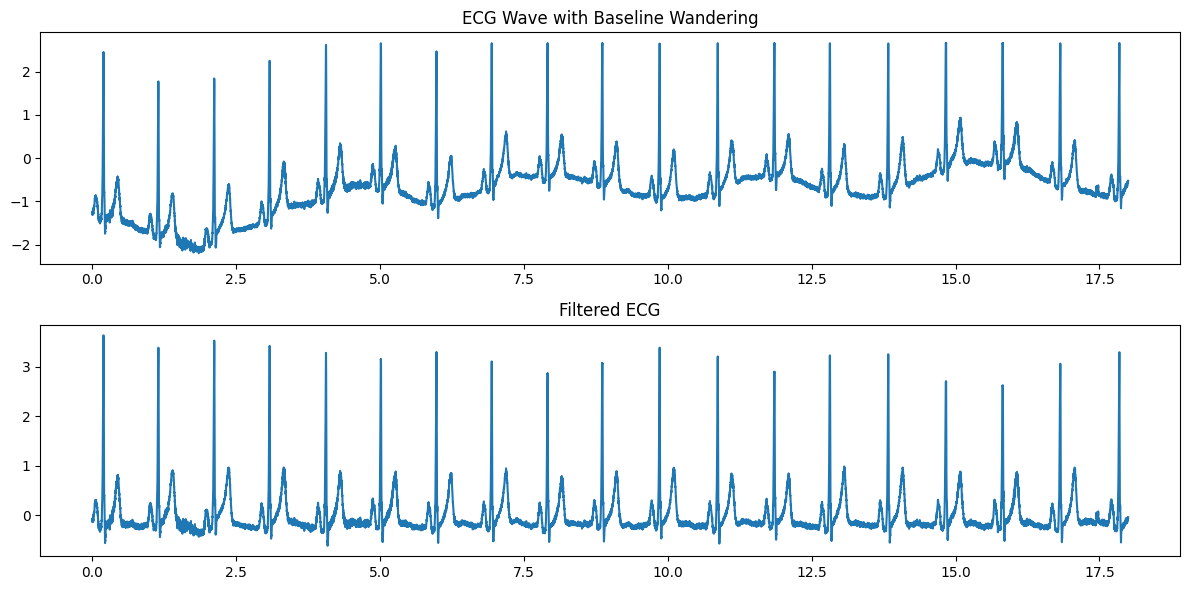

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Load ECG data from a text file
ecg_data = np.loadtxt(r"/workspaces/Biomedical-Signal-Processing-ECG/ecgdataset.txt")
x = ecg_data[2000:20000] 
t = np.arange(0, len(x)/fs, 1/fs)

# Sample rate and time vector assuming evenly sampled data
fs = 1000 

# Baseline wander removal
cutoff_freq = 0.5  # Cutoff frequency in Hz
order = 5  # Filter order

# Butterworth high-pass filter
nyquist_freq = 0.5 * fs
high_cutoff = cutoff_freq / nyquist_freq
b, a = butter(order, high_cutoff, btype='high')

# Apply high-pass filter to remove baseline wander
filtered_ecg = filtfilt(b, a, x)

# Plotting
plt.figure(figsize=(12,6))

plt.subplot(2, 1, 1)
plt.plot(t,x)
plt.title('ECG Wave with Baseline Wandering')

plt.subplot(2, 1, 2)
plt.plot(t,filtered_ecg)
plt.title('Filtered ECG')

plt.tight_layout()
plt.show()

A program to detect QRS Complexes using Pan Tompkins Algorithm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


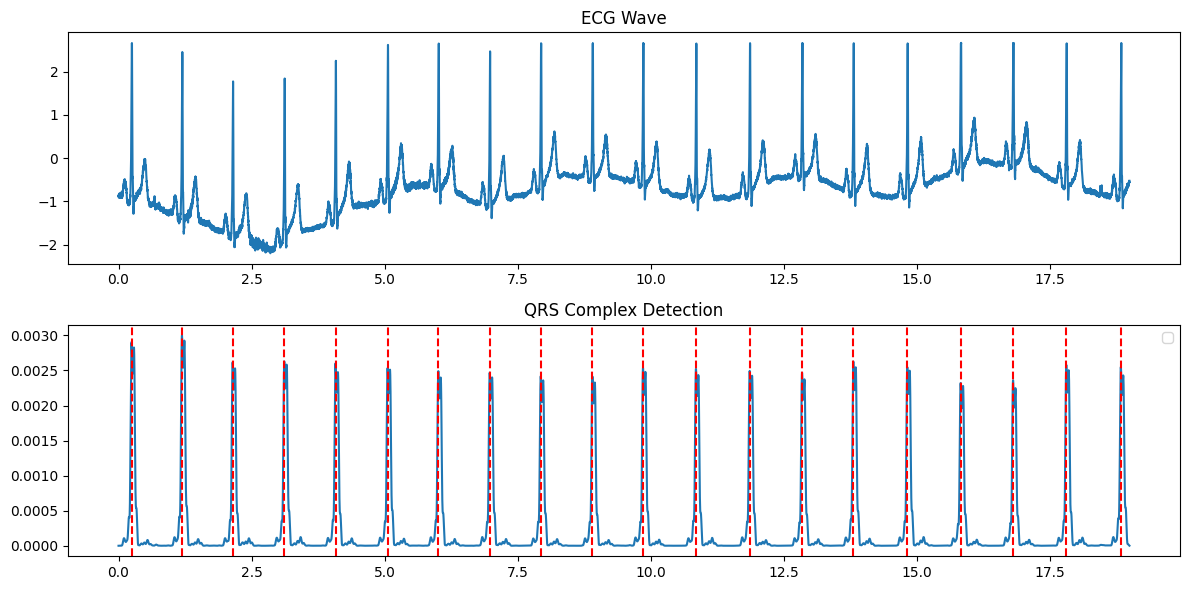

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sc

ecg=np.loadtxt(r"/workspaces/Biomedical-Signal-Processing-ECG/ecgdataset.txt")
x=ecg[1000:20000] # ECG signal
fs=1000
t=np.arange(0,len(x)/fs,1/fs)
W1=5*2/fs
W2=15*2/fs
b,a=sc.butter(4,[W1,W2],'bandpass')
ECG1=sc.filtfilt(b,a,x) # Filtering out 5Hz to 15Hz frequencies

# Pan Tompkins Algorithm
ECG1=np.diff(ECG1) # Differentiating the Filtered Signal
Squared_ECG=np.power(ECG1,2) # Squaring the Signal 
N=40
window=np.ones((1,N))/N # Selecting the Window
ECG2=np.convolve(np.squeeze(Squared_ECG),np.squeeze(window)) # Convolving the Signal
peaks,_=sc.find_peaks(ECG2, height=np.mean(ECG2), distance=round(fs*0.2)) # Finding Peaks
QRS=peaks[peaks<20*fs]

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(t,x)
plt.title('ECG Wave')
plt.subplot(2,1,2)
plt.plot(t,ECG2[:len(t)])
plt.title('QRS Complex Detection')

# Marking the QRS Complexes with a Red dotted line 
for qrs_idx in QRS:
    plt.axvline(t[qrs_idx],color='red',linestyle='--')
plt.tight_layout()
plt.show()